# Introduction

Diffraction is a phenomenon in which waves deviate without any change to their
energy states. While its applications may be more limited, The principle has
applications in both everyday devices, several natural phenomena and is
essential in certain scientific devices used for measurement and observation.
From CD players to the beautiful Godrays you might find on a cloudy day,
diffraction appears in many parts of our day to day lives. In this lab we
explore some of these applications, investigating the ways in which using the
principles of diffraction and interference to measure properties of different
objects or the laser itself.

# Diffraction and Size Measurements

**Materials:** Laser, single-slit apparatus, whiteboard, ruler, hair, blood
slides.

**Methods:** Place the laser at 140 cm from the whiteboard and shine the laser
through the single-slits of different sizes. Measure the central maxima on the
whiteboard for the known slit sizes. Measure other objects' central maxima and
extrapolate their sizes.

*Note that the extrapolation only works if the distance between the laser and
the whiteboard is kept constant.*

## Data and Extrapolation

To linearize the data, we use the following conversion (where $r$ is the central
maxima and $s$ is the slit size):

$$ \log r = m \log s + b $$

$$ \log r = \log s^m + b $$

$$ b = \log C \implies \log r = \log s^m + \log C $$

$$ \log r = \log Cs^m \implies r = Cs^m $$

$$ \boxed{r = 10^b s^m} $$

Using linear regression on the logarithmic data to find $m$ and $b$:


Object               Extrapolated Size
-------------------  -------------------
Jonah's Hair         80.0 µm
Alec's Hair          106.7 µm
Elias' Hair          106.7 µm
Human RBC (healthy)  7.0 µm
Human RBC (sickle)   8.4 µm
Frog RBC             20.0 µm
Bird RBC             10.7 µm


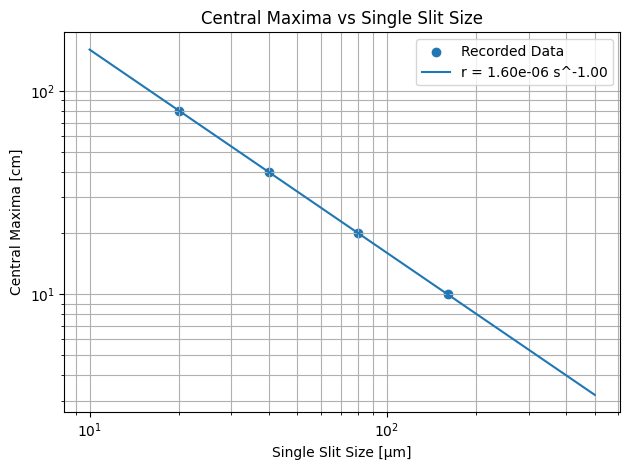

In [ ]:
from math import *

import matplotlib.pyplot as plt
import numpy as np
from si_prefix import si_format
from tabulate import tabulate

# Recorded known data for extrapolation

single_slit_size = np.array([0.02e-3, 0.04e-3, 0.08e-3, 0.16e-3])  # m
single_slit_maxima = np.array([0.08, 0.04, 0.02, 0.01])  # m

# The fringes are not used in the calculations but are recorded anyway
fringes = [4, 12, 20, 80]

# Compute linearization

m, b = np.polyfit(np.log10(single_slit_size), np.log10(single_slit_maxima), 1)
x = np.linspace(1e-5, 5e-4, 256)
f = lambda s: (s**m) * 10**b

# Plot linearization

fig, ax = plt.subplots()

ax.scatter(single_slit_size * 1e6, single_slit_maxima * 1e3, label="Recorded Data")
ax.plot(x * 1e6, f(x) * 1e3, label=f"r = {10**b:.2e} s^{m:.2f}")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Central Maxima vs Single Slit Size")
ax.set_xlabel("Single Slit Size [µm]")
ax.set_ylabel("Central Maxima [cm]")
ax.legend()
ax.grid(which="both")

fig.tight_layout()


# Beautifully Pythonic and "functional" code!

print(tabulate(zip(["Jonah's Hair","Alec's Hair","Elias' Hair","Human RBC (healthy)","Human RBC (sickle)","Frog RBC","Bird RBC",],[s + "m" for s in map(si_format, map(f, [0.020, 0.015, 0.015, 0.23, 0.19, 0.08, 0.15]))],),headers=["Object", "Extrapolated Size"],))

# Recorded cental maxima sizes for different objects are in the horrible
# one-liner I made below in the *second* input to zip() in meters

## Analysis

Our extrapolation of the data matches realistic values very closely. For
example, real human red blood cells are between 6-9 µm, and out found value was
exactly 7.0 µm. Human hair is within 60-120 µm, and all out values are in that
range. Another point mentioning is that the sickle cells had a lot of scattering
lines within the maxima. The reason that the sickle cell blood had a regular
seeming structure, but still had the streaks, is due to the shape of the sickle
cells. The thin line would cause a more slit-like interference pattern hence the
streaks.

Also, Elias' shirt is cross-stitched as was evident in the interference pattern.
There were two interference patterns in perpendicular directions with the same
shape.

# Measuring the Wavelength of the Laser

**Materials:** Laser, double-slit apparatus, whiteboard, ruler.

**Methods:** Place the laser at 140 cm from the whiteboard and shine the laser
through the double-slit apparatus. Measure the central maxima on the whiteboard
and count the number of anti-nodes.

**Data:** For a spacing between the slits of 250 µm, the central maxima was 4 cm
across with 10 anti-nodes. The slit size was 40 µm and the distance from the
laser to the whiteboard was 140 cm.

**Calculations:** The double-slit interference formula is:

$$ \lambda = \frac{xd}{L} $$

where $L$ is the distance from the slits to the whiteboard, $d$ is the distance
between the slits, $\lambda$ is the wavelength of the light, and $x$ is the
fringe spacing (distance between bright spots).

We measured the number of nodes in the central maxima and its width, so:

$$ x = \frac{W}{n} $$

where $n$ is the number of nodes. Plugging this in and substituting for real
values:

$$ \lambda = \frac{Wd}{Ln} = \boxed{714 \, \mathrm{nm}}$$

**Analysis:** This wavelength would imply the light is red, but it was green.
This is most likely due to measurement error, especially for the distance
between the slits and whiteboard, which was measured haphazardly. However, this
value is still within the order of magnitude of visible light.

# Conclusion

Our experimentation allowed us to determine the wavelength of the light to be
714 nm, which is a bit odd, as the laser itself was visibly green. Alongside
this, we also used the laser to determine the stitch in Elias’s shirt to be a
cross stitch, which was visible due to the fact that when the laser was shone
through the fabric, we noticed two interference patterns. We also determined
that the relationship between the number of fringes and the size of the slit
passed through to be inversely proportional. Most notably, we were able to
determine the size of red blood cells and hairs with a similar method. We
determined that Jonah’s hairs to be thinnest of the group at only 80 µm. We
measured a human red blood cell to be 7 µm, smaller than those of both frogs and
birds at 20.0 µm and 10.7 µm respectively. We got hands-on experience with the
applications of diffraction and interference in this lab, allowing us a glimpse
into the many interesting applications of physics even though it may not be
immediately intuitive, these principles have many uses in engineering and the
sciences.


